In [1]:
import pymongo
import pandas as pd
import numpy as np

from pymongo import MongoClient
from bson.objectid import ObjectId

import datetime

import matplotlib.pyplot as plt

from collections import defaultdict


%matplotlib inline
import json
plt.style.use('ggplot')

import seaborn as sns

from math import log10, floor

In [2]:
## Connect to local DB

client = MongoClient('localhost', 27017)
print ("Setup db access")

Setup db access


In [3]:
#
# Get collections from mongodb
#
#db = client.my_test_db
db = client.test


In [4]:
chunk = 100000
start = 0
end = start + chunk

In [5]:
#reponses = db.anon_student_task_responses.find({'correct':False})[start:end]
reponses = db.anon_student_task_responses.find()[start:end]

In [6]:
df_responses = pd.DataFrame(list(reponses))

In [7]:
print (df_responses.head())

                        _id               behavioral_traits  bonus  correct  \
0  5a00f1739100de1a390000d0                              []  False     True   
1  5a00f1739100de1a390000d5  [measuring_tools, orange_tick]  False     True   
2  5a00f1739100de1a390000d9                              []  False     True   
3  5a00f1739100de1a390000dc                              []  False     True   
4  5a00f1739100de1a390000df                              []  False     True   

       diff          id  incomplete         lesson  \
0  0.000000  nvrm82_9Yv       False       nline_1b   
1  0.563288  jVG3p9f-20       False       nline_1b   
2  0.601043  _NUUDSBMum       False  equivalence_0   
3  0.686276  B6HmMEMpoL       False  equivalence_0   
4  0.642014  IYWiIP26on       False  equivalence_0   

                                       level_summary  \
0  {'entered': True, 'path': 'nline_1b', 'lm_stat...   
1  {'entered': True, 'path': 'nline_1b', 'lm_stat...   
2  {'subject': 'fractions', 'uni

In [8]:
df_responses.shape

(100000, 27)

In [9]:
df2 = df_responses.join(pd.DataFrame(df_responses["student"].to_dict()).T)

In [10]:
df2 = df2.join(pd.DataFrame(df2['level_summary'].to_dict()).T)

In [11]:
df2 = df2.join(pd.DataFrame(df2['problems'].to_dict()).T)

In [12]:
df3  = df2.copy()

In [13]:
## Look act columns
print (df_responses.columns)

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched'],
      dtype='object')


In [14]:
## How many data samples
print (len(df_responses), "Number of entries")

100000 Number of entries


In [15]:
## Make 'description' a feature wih important words mapped

In [16]:
df3.columns

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched', 'grade',
       'mvt_group', 'mvt_group_code', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong'],
      dtype='object')

In [17]:
df3['percent_correct'] = df3['nright'].astype(float) / df3['ntotal']

In [18]:
df3.iloc[0]

_id                                              5a00f1739100de1a390000d0
behavioral_traits                                                      []
bonus                                                               False
correct                                                              True
diff                                                                    0
id                                                             nvrm82_9Yv
incomplete                                                          False
lesson                                                           nline_1b
level_summary           {'entered': True, 'path': 'nline_1b', 'lm_stat...
problem_set             lessons/fractions/lesson13_1/part_a/media/prob...
problem_set_id                                                 _Pd6uU3viE
problem_set_subspace                                                parta
qual_id                                       _Pd6uU3viE.parta.nvrm82_9Yv
randomly_selected                     

In [19]:
for idx in range(100):
    print ('index"', idx)
    print (df3.iloc[idx]['lesson'])
    print (df3.iloc[idx]['response'])

index" 0
nline_1b
{'fraction_cblock_chains': [{'right': 442, 'sum': {'numerator': 1, 'denominator': 2, '__as3_type': 'Fraction'}, 'pieces': ['1/2'], 'left': 97, 'lcm_sum': {'numerator': 1, 'denominator': 2, '__as3_type': 'Fraction'}}], 'plain_image_groups': [{'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/markers/start_marker.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/dog.swf'}, {'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf'}], 'den': '2', 'fraction_input_value': '1/2', 'num': '1', 'fraction_cblock_total_count': 1, 'numberline_associations': [[]], 'fraction_cblock_counts': {'1/2': 1}, 'fraction_cblock_containment': {}, 'whole': ''}
index" 1
nline_1b
{'fraction_cblock_total_count': 4, 'plain_image_groups': [{'total': 1, 'url': 'assets/cms/wootmath_fractions/number_line/objects/panda.swf'}, {'total': 1

In [20]:
def stringify_response(resp):
    my_val = str(resp).replace("': ","_")
    my_val = my_val.replace("_{"," ")
    my_val = my_val.replace("_[",", ")
    for c in [']','[','{','}',"'","",","]:
        my_val = my_val.replace(c,'')
    return my_val


In [21]:
stringify_response(df3.iloc[0]['response'])

'fraction_cblock_chains right_442 sum numerator_1 denominator_2 __as3_type_Fraction pieces 1/2 left_97 lcm_sum numerator_1 denominator_2 __as3_type_Fraction plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/dog.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf den_2 fraction_input_value_1/2 num_1 fraction_cblock_total_count_1 numberline_associations  fraction_cblock_counts 1/2_1 fraction_cblock_containment  whole_'

In [22]:
df3['response_str'] = df3['response'].apply(stringify_response)

In [23]:
for idx in range(20):
    print (idx, df3['response_str'].iloc[idx])

0 fraction_cblock_chains right_442 sum numerator_1 denominator_2 __as3_type_Fraction pieces 1/2 left_97 lcm_sum numerator_1 denominator_2 __as3_type_Fraction plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/dog.swf total_1 url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf den_2 fraction_input_value_1/2 num_1 fraction_cblock_total_count_1 numberline_associations  fraction_cblock_counts 1/2_1 fraction_cblock_containment  whole_
1 fraction_cblock_total_count_4 plain_image_groups total_1 url_assets/cms/wootmath_fractions/number_line/objects/panda.swf total_1 url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf input_4 fraction_cblock_chains right_856 sum numerator_1 denominator_1 __as3_type_Fraction pieces 1/4 1/4 1/4 1/4 left_165 lcm_sum numerator_4 denomina

In [24]:
df3.columns

Index(['_id', 'behavioral_traits', 'bonus', 'correct', 'diff', 'id',
       'incomplete', 'lesson', 'level_summary', 'problem_set',
       'problem_set_id', 'problem_set_subspace', 'qual_id',
       'randomly_selected', 'response', 'response_idx', 'retried',
       'screenshot_url', 'second_try', 'session_id', 'student', 'sublesson',
       't', 'time_spent', 'timestamp', 'txt', 'untouched', 'grade',
       'mvt_group', 'mvt_group_code', 'school_id', 'section_id', 'student_id',
       'blank_slate_mastery', 'description', 'entered', 'lesson_type',
       'lm_stats', 'mastery', 'name', 'path', 'problems', 'stars', 'subject',
       't_elapsed', 'time_entered', 'time_exited', 'title', 'type',
       'unit_name', 'unit_rank', 'nretry_right', 'nretry_wrong', 'nright',
       'ntotal', 'nuntouched', 'nwrong', 'percent_correct', 'response_str'],
      dtype='object')

In [25]:
## In Response:
### convert K, V, and all K_V into words in a text doc
### Then add text
### The add description


In [26]:
def make_string_from_list(key, elem_list):
    # Append key to each item in list
    ans = ''
    for elem in elem_list:
        ans += key + '_' + elem 
        
        

        
    

def make_string(elem, key=None, top=True):
    ans = ''
    if not elem:
        return ans
    if top:
        top = False
        top_keys = []
        for idx in range(len(elem.keys())):
            top_keys.append(True)
            
    for idx, key in enumerate(elem.keys()):
        if top_keys[idx]:
            top = True
            top_keys[idx] = False
            ans += ' '
        else:
            top = False
        #print ('ans = ', ans)
        #print (type(elem[key]))
        if type(elem[key]) is str or\
                type(elem[key]) is int:
            #print ('add value', elem[key])
            value = str(elem[key])
            #ans += key + '_' + value + ' ' + value + ' '
            ans += key + '_' + value + ' '
        elif type(elem[key]) is list:
            #print ('add list', elem[key])
            temp_elem = dict()
            for item in elem[key]:
                temp_elem[key] = item
                ans += make_string(temp_elem, top) 
        elif type(elem[key]) is dict:
            #print ('add dict', elem[key])
            for item_key in elem[key].keys():
                temp_elem = dict()
                temp_elem[item_key] = elem[key][item_key]
                ans += key + '_' + make_string(temp_elem, top)
        elif type(elem[key]) is float:
            #print ('add dict', elem[key])
            sig = 2
            value = elem[key]
            value = round(value, sig-int(
            floor(log10(abs(value))))-1)
            value = str(value)
            #ans += key + '_' + value + ' ' + value + ' '
            ans += key + '_' + value + ' '
        # ans += ' ' + key + ' '
        #print ('not handled', elem[key])
     
        
    return ans
        
            
            

In [27]:
df3['response_doc'] = df3['response'].map(make_string)

In [28]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x + ' ')

In [29]:
df3['response_doc'] = df3['response_doc'] + df3['txt'] 

In [30]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x + ' ')

In [31]:
df3['response_doc'] = df3['response_doc'] +  df3['description']

In [32]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x.replace("\n", ""))

In [33]:
df3['response_doc'] = df3['response_doc'].map(lambda x: x.replace("?", " "))

In [34]:
df3.iloc[100]['response_doc']

" radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets/cms/wootmath_fractions/equal_parts/sixths/sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets/cms/wootmath_fractions/equal_parts/sixths/sixth_06.swf plain_image_groups_ total_1  Do these shapes have 5/6 shaded Answer: [object Object] Students deepen their understanding of fractions by identifying area models that are divided into equal parts and those that aren't. "

In [35]:
df3.iloc[100]['response']

{'plain_image_groups': [{'total': 1,
   'url': 'assets/cms/wootmath_fractions/equal_parts/sixths/sixth_15.swf'},
  {'total': 1,
   'url': 'assets/cms/wootmath_fractions/equal_parts/sixths/sixth_06.swf'}],
 'radio_group_mc1': {'choice': 'B', 'text': 'No'},
 'radio_group_mc2': {'choice': 'A', 'text': 'Yes'}}

In [36]:
for idx in range(20):
    print (idx, df3['response_doc'].iloc[idx])

0   fraction_cblock_chains_ right_442 fraction_cblock_chains_ sum_ numerator_1 sum_ denominator_2 sum_ __as3_type_Fraction fraction_cblock_chains_  pieces_1/2 fraction_cblock_chains_ left_97 fraction_cblock_chains_ lcm_sum_ numerator_1 lcm_sum_ denominator_2 lcm_sum_ __as3_type_Fraction   plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/markers/end_marker_noline.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/markers/start_marker.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/objects/dog.swf  plain_image_groups_ total_1 plain_image_groups_ url_assets/cms/wootmath_fractions/number_line/objects/cat_dog_trail.swf  den_2  fraction_input_value_1/2  num_1  fraction_cblock_total_count_1    fraction_cblock_counts_ 1/2_1   whole_  Use the 1/2 pieces to figure out how far the dog traveled.Answer: 1/2 In the first part of this lesson, student partitio

In [37]:
df3['response_doc'] = df3['response_doc'].map( lambda x: " ".join(x.split('/')) if '/' in x else x)

In [38]:
df3.iloc[100]['response_doc']

" radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_06.swf plain_image_groups_ total_1  Do these shapes have 5 6 shaded Answer: [object Object] Students deepen their understanding of fractions by identifying area models that are divided into equal parts and those that aren't. "

In [39]:
df3['response_doc'] = df3['response_doc'].map( lambda x: x.replace('[',' '))
df3['response_doc'] = df3['response_doc'].map( lambda x: x.replace(']',' '))

In [40]:
df3.iloc[100]['response_doc']

" radio_group_mc2_ choice_A radio_group_mc2_ text_Yes  radio_group_mc1_ choice_B radio_group_mc1_ text_No   plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_15.swf plain_image_groups_ total_1  plain_image_groups_ url_assets cms wootmath_fractions equal_parts sixths sixth_06.swf plain_image_groups_ total_1  Do these shapes have 5 6 shaded Answer:  object Object  Students deepen their understanding of fractions by identifying area models that are divided into equal parts and those that aren't. "

In [41]:
docs = list(df3['response_doc'])

In [42]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [43]:
data_samples = docs

In [44]:
n_features = 1000
n_samples = len(data_samples)
n_topics = 50
n_top_words = 20

In [45]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')

Extracting tf-idf features for NMF...


In [46]:
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


done in 20.353s.


In [47]:
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


Extracting tf features for LDA...
done in 21.672s.


In [48]:
n_features = 1000
n_samples = len(data_samples)
n_topics = 50
n_top_words = 20

In [49]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


Extracting tf-idf features for NMF...
done in 26.211s.
Extracting tf features for LDA...
done in 22.671s.


In [50]:

from sklearn.cluster import KMeans, MiniBatchKMeans
true_k = 100

km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000)

In [51]:
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(tf)
print("done in %0.3fs" % (time() - t0))
print()

Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10,
        n_clusters=100, n_init=1, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)
done in 6.158s



In [52]:
print("Top terms per cluster:")


order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tf_vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: fraction_cblock_chains_ lcm_sum_ sum_ __as3_type_fraction numerator_1 pieces_1 denominator_1 fraction_cblock_counts_ bar1_ bar2_
Cluster 1: common fraction students comparison fractions correct compare choose denominators numerators
Cluster 2: pieces_1 fraction_circle_groups_ fraction lcm_sum_ sum_ chains_ 1_ __as3_type_fraction fraction_circle_counts_ pieces
Cluster 3: fraction_cblock_chains_ lcm_sum_ sum_ __as3_type_fraction pieces_1 numerator_1 denominator_1 fraction_cblock_counts_ fraction denominator_3
Cluster 4: fraction_cblock_chains_ lcm_sum_ sum_ __as3_type_fraction numerator_1 pieces_1 denominator_1 denominator_8 fraction_cblock_counts_ denominator_4
Cluster 5: fraction_cblock_chains_ sum_ lcm_sum_ __as3_type_fraction numerator_1 pieces_1 denominator_12 12 fraction denominator_5
Cluster 6: fraction_circle_groups_ pieces_1 12 lcm_sum_ sum_ scale_1 fraction __as3_type_fraction frac_piece_ chains_
Cluster 7: pieces_1 12 fraction_circle_groups_ 1

In [53]:
len(km.labels_)

100000

In [54]:
np.bincount(km.labels_)

array([ 563, 3863,  997, 1703,  850,  101,  129,   88,  708,  229, 1544,
       1370, 1944,  586,  184,  933, 2005,  858, 1703,  711,  415,  186,
       1245, 1541,  378,  275, 2342,  380,  467,  217, 9531,  283,  262,
        613, 7246,  571,   65, 1126,  204,  771,    3,  697,  901, 1085,
        211,  387, 1203, 1360,  450,  300,  675,  782, 1010,  188,  436,
        127,   30,  429,  421,   81, 2315,    1,  840,  217, 1000, 1840,
        487,   37, 2924,  179,  755,  668, 1186,  592, 3620,  350,   68,
        543,  926,   46,  933, 1099, 1421, 2596, 1500,  565,  369,  421,
       1065,  164,  827, 1366,   91, 1156,  993,    8,  947,  242,    0,
       5680])

In [55]:
df3['cluster_100'] = km.labels_

In [56]:
len(np.bincount(km.labels_))

100

In [57]:
df3['cluster_100'] = km.labels_


In [58]:
df3['trait_1'] = df3['behavioral_traits'].apply(lambda x : x[0] if len(x) > 0 else 'None' )

In [59]:
df3['trait_2'] = df3['behavioral_traits'].apply(lambda x : x[1] if len(x) > 1 else 'None' ) 

In [60]:
df3['trait_1'].value_counts()

None                             71238
how_to_model                      5348
inverts_numerator_denominator     4638
identifying_gt_lt                 2806
deci_understanding_gt_lt          1425
recognizing_the_whole             1307
deci_incorrect_inequality         1282
starting_from_0_nline             1047
dragging_to_add                    956
counting_hops_not_ticks            892
inequality_symbol                  788
partially_drawn_parts              680
modeled_incorrect_comparison       673
comparing_frac_gt_lt               542
misplaced_fraction_part_nline      480
measuring_tools                    459
deci_placing_decimal_points        408
partitioning_number_line           398
nline_as_whole                     325
deci_tens_vs_tenths                317
simplifying_mixed_numbers          292
simplify_with_common_denom         289
simplifying_bars_2                 280
deci_forgot_decimal_point          274
deci_hops_instead_ticks            274
deci_hundredths_vs_tenths

In [61]:
df3['trait_2'].value_counts()

None                            95784
simplifying_mixed_numbers         835
equally_sized_parts               680
modeled_incorrect_numerator       673
orange_tick                       459
simplifying_answers_nline         421
wrong_number_parts                398
dragging_to_add_3_circles         292
deci_break_tenths_hundredths      236
nline_restart_one                 214
modulo_ans                          8
Name: trait_2, dtype: int64

In [62]:
df_cluster_100 = df3.groupby('cluster_100')

In [63]:
len(df_cluster_100)

99

In [64]:
df_cluster_100.head()

,_id,behavioral_traits,bonus,correct,diff,id,incomplete,lesson,level_summary,problem_set,...,nright,ntotal,nuntouched,nwrong,percent_correct,response_str,response_doc,cluster_100,trait_1,trait_2
0,5a00f1739100de1a390000d0,[],False,True,0.000000,nvrm82_9Yv,False,nline_1b,"{'entered': True, 'path': 'nline_1b', 'lm_stat...",lessons/fractions/lesson13_1/part_a/media/prob...,...,9,9,0,0,1.000000,fraction_cblock_chains right_442 sum numerator...,fraction_cblock_chains_ right_442 fraction_c...,42,None,None
1,5a00f1739100de1a390000d5,"[measuring_tools, orange_tick]",False,True,0.563288,jVG3p9f-20,False,nline_1b,"{'entered': True, 'path': 'nline_1b', 'lm_stat...",lessons/fractions/lesson13_1/part_b/media/prob...,...,9,9,0,0,1.000000,fraction_cblock_total_count_4 plain_image_grou...,fraction_cblock_total_count_4 plain_image_g...,8,measuring_tools,orange_tick
2,5a00f1739100de1a390000d9,[],False,True,0.601043,_NUUDSBMum,False,equivalence_0,"{'subject': 'fractions', 'unit_name': 'frac_eq...",lessons/fractions/lesson22_4/part_a/media/prob...,...,9,9,0,0,1.000000,fraction_cblock_chains left_176 lcm_sum numera...,fraction_cblock_chains_ left_176 fraction_cb...,3,None,None
3,5a00f1739100de1a390000dc,[],False,True,0.686276,B6HmMEMpoL,False,equivalence_0,"{'subject': 'fractions', 'unit_name': 'frac_eq...",lessons/fractions/lesson22_4/part_a/media/prob...,...,9,9,0,0,1.000000,fraction_cblock_chains left_176 lcm_sum numera...,fraction_cblock_chains_ left_176 fraction_cb...,81,None,None
4,5a00f1739100de1a390000df,[],False,True,0.642014,IYWiIP26on,False,equivalence_0,"{'subject': 'fractions', 'unit_name': 'frac_eq...",lessons/fractions/lesson22_4/part_b/media/prob...,...,9,9,0,0,1.000000,fraction_circle_containment Fraction 1/2 lcm_s...,fraction_circle_containment_ Fraction 1 2_ ...,17,None,None
5,5a00f1739100de1a390000e2,[],False,True,0.000000,bUoNJIVgJi,False,review_lesson_4,"{'subject': 'review', 'unit_name': '', 'title'...",lessons/fractions/lesson12/sets_large/media/pr...,...,1,4,1,3,0.250000,image_object_groups total_6 on_3 url_assets/ob...,image_object_groups_ total_6 image_object_gr...,65,None,None
6,5a00f1739100de1a390000e7,[],False,False,0.284006,39Y1vECA2c,False,review_lesson_4,"{'subject': 'review', 'unit_name': '', 'title'...",lessons/fractions/lesson10/quarters_ab/quarter...,...,1,4,1,3,0.250000,None,"Shade 1 4 of the circle.answer={:n=>3, :d=>12...",83,None,None
7,5a00f1739100de1a390000ea,[],False,False,0.168491,faYl5HT_Sn,False,review_lesson_4,"{'subject': 'review', 'unit_name': '', 'title'...",lessons/fractions/lesson11/thirds/media/proble...,...,0,3,4,3,0.000000,None,"Shade 1 3 of the rectangle.answer={:n=>2, :d=...",83,None,None
8,5a00f1739100de1a390000ed,[],False,True,0.397506,jzC49--8x7,False,model_symbol_6,"{'type': 'lesson', 'mastery': {'mean': 0.78899...",lessons/fractions/lesson08_3/part_a/media/prob...,...,8,8,0,0,1.000000,fraction_circle_groups x_512 scale_1 chains pi...,fraction_circle_groups_ x_512 fraction_circl...,17,None,None
9,5a00f1739100de1a390000f0,[],False,True,1.000000,hxS1eqLik1,False,model_symbol_6,"{'type': 'lesson', 'mastery': {'mean': 0.78899...",lessons/fractions/lesson08_3/part_b/media/prob...,...,8,8,0,0,1.000000,fraction_circle_groups x_512 scale_0.999999999...,fraction_circle_groups_ x_512 fraction_circl...,17,None,None


In [65]:
df3['percent_correct'].groupby(df3['cluster_100']).describe()

,count,mean,std,min,25%,50%,75%,max
cluster_100,,,,,,,,
0,563.0,0.883890,0.159636,0.000000,0.800000,1.000000,1.000000,1.000000
1,3863.0,0.735697,0.234215,0.000000,0.571429,0.800000,1.000000,1.000000
2,997.0,0.853663,0.189596,0.000000,0.800000,0.875000,1.000000,1.000000
3,1703.0,0.777998,0.251182,0.000000,0.714286,0.818182,1.000000,1.000000
4,850.0,0.799276,0.234300,0.000000,0.714286,0.857143,1.000000,1.000000
5,101.0,0.733002,0.247296,0.000000,0.636364,0.800000,0.888889,1.000000
6,129.0,0.865814,0.127487,0.000000,0.800000,0.888889,1.000000,1.000000
7,88.0,0.598166,0.314265,0.000000,0.285714,0.636364,0.888889,1.000000
8,708.0,0.853752,0.178562,0.000000,0.800000,0.888889,1.000000,1.000000


In [66]:
df_trait_1 = df3.groupby(['cluster_100', 'trait_1']).size().unstack(fill_value=0)

In [67]:
df_trait_2 = df3.groupby(['cluster_100', 'trait_2']).size().unstack(fill_value=0)

In [68]:
df_trait_2

trait_2,None,deci_break_tenths_hundredths,dragging_to_add_3_circles,equally_sized_parts,modeled_incorrect_numerator,modulo_ans,nline_restart_one,orange_tick,simplifying_answers_nline,simplifying_mixed_numbers,wrong_number_parts
cluster_100,,,,,,,,,,,
0,563,0,0,0,0,0,0,0,0,0,0
1,3863,0,0,0,0,0,0,0,0,0,0
2,997,0,0,0,0,0,0,0,0,0,0
3,1698,0,0,0,2,0,0,3,0,0,0
4,828,0,0,0,22,0,0,0,0,0,0
5,98,0,0,0,2,0,1,0,0,0,0
6,129,0,0,0,0,0,0,0,0,0,0
7,48,0,38,0,0,0,0,0,0,2,0
8,325,0,0,0,0,0,0,383,0,0,0


In [69]:
df_trait_2.columns

Index(['None', 'deci_break_tenths_hundredths', 'dragging_to_add_3_circles',
       'equally_sized_parts', 'modeled_incorrect_numerator', 'modulo_ans',
       'nline_restart_one', 'orange_tick', 'simplifying_answers_nline',
       'simplifying_mixed_numbers', 'wrong_number_parts'],
      dtype='object', name='trait_2')

In [70]:
df_trait_1.columns

Index(['None', 'area_model', 'benchmark_1_2', 'benchmark_quarters',
       'comparing_frac_gt_lt', 'counting_hops_for_division',
       'counting_hops_not_ticks', 'deci_add_to_model',
       'deci_break_tenths_hundredths', 'deci_building_tenths',
       'deci_compare_no_models', 'deci_forgot_decimal_point',
       'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths',
       'deci_incorrect_inequality', 'deci_placing_decimal_points',
       'deci_point_location_correct', 'deci_tens_vs_tenths',
       'deci_understanding_gt_lt', 'determine_the_frac_part',
       'dragging_to_add', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model',
       'identifying_gt_lt', 'inequality_symbol',
       'inverts_numerator_denominator', 'measuring_tools',
       'misplaced_fraction_part_nline', 'mixed_number_quotient',
       'mixed_numbers_on_number_line', 'modeled_incorrect_comparison',
       'modeling_fraction_division', 'multiplication',
       'multiplying_whole_by_proper', 'nline_as_whole',
     

In [71]:
[x for x in df_trait_2.columns if x not in df_trait_1.columns ]

['dragging_to_add_3_circles',
 'equally_sized_parts',
 'modeled_incorrect_numerator',
 'modulo_ans',
 'nline_restart_one',
 'orange_tick',
 'simplifying_answers_nline',
 'wrong_number_parts']

In [72]:
[x for x in df_trait_1.columns if x not in df_trait_2.columns ]

['area_model',
 'benchmark_1_2',
 'benchmark_quarters',
 'comparing_frac_gt_lt',
 'counting_hops_for_division',
 'counting_hops_not_ticks',
 'deci_add_to_model',
 'deci_building_tenths',
 'deci_compare_no_models',
 'deci_forgot_decimal_point',
 'deci_hops_instead_ticks',
 'deci_hundredths_vs_tenths',
 'deci_incorrect_inequality',
 'deci_placing_decimal_points',
 'deci_point_location_correct',
 'deci_tens_vs_tenths',
 'deci_understanding_gt_lt',
 'determine_the_frac_part',
 'dragging_to_add',
 'fraction_of_set',
 'hops_vs_ticks',
 'how_to_model',
 'identifying_gt_lt',
 'inequality_symbol',
 'inverts_numerator_denominator',
 'measuring_tools',
 'misplaced_fraction_part_nline',
 'mixed_number_quotient',
 'mixed_numbers_on_number_line',
 'modeled_incorrect_comparison',
 'modeling_fraction_division',
 'multiplication',
 'multiplying_whole_by_proper',
 'nline_as_whole',
 'numerator_off_by_one_nline',
 'only_tenths_entered',
 'partially_drawn_parts',
 'partitioning_number_line',
 'recognizing

In [73]:
#df_trait_1 = df_trait_1.drop('None', axis=1)
#df_trait_2 = df_trait_2.drop('None', axis=1)

In [74]:
df_traits = pd.merge(left=df_trait_1,right=df_trait_2, how='left' )


In [75]:
df_trait_1.index.rename('cluster_100', inplace=True)

In [76]:
df_trait_2.index.rename('cluster_100', inplace=True)

In [77]:
df_traits.columns

Index(['None', 'area_model', 'benchmark_1_2', 'benchmark_quarters',
       'comparing_frac_gt_lt', 'counting_hops_for_division',
       'counting_hops_not_ticks', 'deci_add_to_model',
       'deci_break_tenths_hundredths', 'deci_building_tenths',
       'deci_compare_no_models', 'deci_forgot_decimal_point',
       'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths',
       'deci_incorrect_inequality', 'deci_placing_decimal_points',
       'deci_point_location_correct', 'deci_tens_vs_tenths',
       'deci_understanding_gt_lt', 'determine_the_frac_part',
       'dragging_to_add', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model',
       'identifying_gt_lt', 'inequality_symbol',
       'inverts_numerator_denominator', 'measuring_tools',
       'misplaced_fraction_part_nline', 'mixed_number_quotient',
       'mixed_numbers_on_number_line', 'modeled_incorrect_comparison',
       'modeling_fraction_division', 'multiplication',
       'multiplying_whole_by_proper', 'nline_as_whole',
     

In [78]:
df_traits = pd.concat([df_trait_1, df_trait_2], axis=1)

In [79]:
print (df_traits.shape)
print (df_trait_1.shape)
print (df_trait_2.shape)


(99, 62)
(99, 51)
(99, 11)


In [80]:
df_traits.columns

Index(['None', 'area_model', 'benchmark_1_2', 'benchmark_quarters',
       'comparing_frac_gt_lt', 'counting_hops_for_division',
       'counting_hops_not_ticks', 'deci_add_to_model',
       'deci_break_tenths_hundredths', 'deci_building_tenths',
       'deci_compare_no_models', 'deci_forgot_decimal_point',
       'deci_hops_instead_ticks', 'deci_hundredths_vs_tenths',
       'deci_incorrect_inequality', 'deci_placing_decimal_points',
       'deci_point_location_correct', 'deci_tens_vs_tenths',
       'deci_understanding_gt_lt', 'determine_the_frac_part',
       'dragging_to_add', 'fraction_of_set', 'hops_vs_ticks', 'how_to_model',
       'identifying_gt_lt', 'inequality_symbol',
       'inverts_numerator_denominator', 'measuring_tools',
       'misplaced_fraction_part_nline', 'mixed_number_quotient',
       'mixed_numbers_on_number_line', 'modeled_incorrect_comparison',
       'modeling_fraction_division', 'multiplication',
       'multiplying_whole_by_proper', 'nline_as_whole',
     

In [81]:
df_traits

,None,area_model,benchmark_1_2,benchmark_quarters,comparing_frac_gt_lt,counting_hops_for_division,counting_hops_not_ticks,deci_add_to_model,deci_break_tenths_hundredths,deci_building_tenths,...,deci_break_tenths_hundredths,dragging_to_add_3_circles,equally_sized_parts,modeled_incorrect_numerator,modulo_ans,nline_restart_one,orange_tick,simplifying_answers_nline,simplifying_mixed_numbers,wrong_number_parts
cluster_100,,,,,,,,,,,,,,,,,,,,,
0,563,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1009,0,0,0,149,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,286,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1531,0,0,0,5,0,0,0,0,0,...,0,0,0,2,0,0,3,0,0,0
4,758,0,0,0,0,0,0,0,0,0,...,0,0,0,22,0,0,0,0,0,0
5,82,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,0
6,125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,27,0,0,0,0,0,0,0,0,0,...,0,38,0,0,0,0,0,0,2,0
8,325,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,383,0,0,0


In [82]:
df_traits = df_traits.drop('None', axis=1)

In [83]:
df_traits

,area_model,benchmark_1_2,benchmark_quarters,comparing_frac_gt_lt,counting_hops_for_division,counting_hops_not_ticks,deci_add_to_model,deci_break_tenths_hundredths,deci_building_tenths,deci_compare_no_models,...,deci_break_tenths_hundredths,dragging_to_add_3_circles,equally_sized_parts,modeled_incorrect_numerator,modulo_ans,nline_restart_one,orange_tick,simplifying_answers_nline,simplifying_mixed_numbers,wrong_number_parts
cluster_100,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,149,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,5,0,0,0,0,0,0,...,0,0,0,2,0,0,3,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,22,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,38,0,0,0,0,0,0,2,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,383,0,0,0


In [84]:
import seaborn as sns

In [124]:
#df_traits_norm = (df_traits - df_traits.mean()) / (df_traits.max() - df_traits.min())
df_traits_norm = (df_traits  / (df_traits.sum()) )

In [125]:
df_traits_norm = df_traits_norm.applymap( lambda x: 0 if x < 0 else x)

In [126]:
df_traits_norm

,area_model,benchmark_1_2,benchmark_quarters,comparing_frac_gt_lt,counting_hops_for_division,counting_hops_not_ticks,deci_add_to_model,deci_break_tenths_hundredths,deci_building_tenths,deci_compare_no_models,...,deci_break_tenths_hundredths,dragging_to_add_3_circles,equally_sized_parts,modeled_incorrect_numerator,modulo_ans,nline_restart_one,orange_tick,simplifying_answers_nline,simplifying_mixed_numbers,wrong_number_parts
cluster_100,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.274908,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.006289,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.009225,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.002972,0.0,0.000000,0.006536,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.032689,0.0,0.000000,0.000000,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.002972,0.0,0.004673,0.000000,0.0,0.000000,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.130137,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.002395,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.834423,0.0,0.000000,0.0


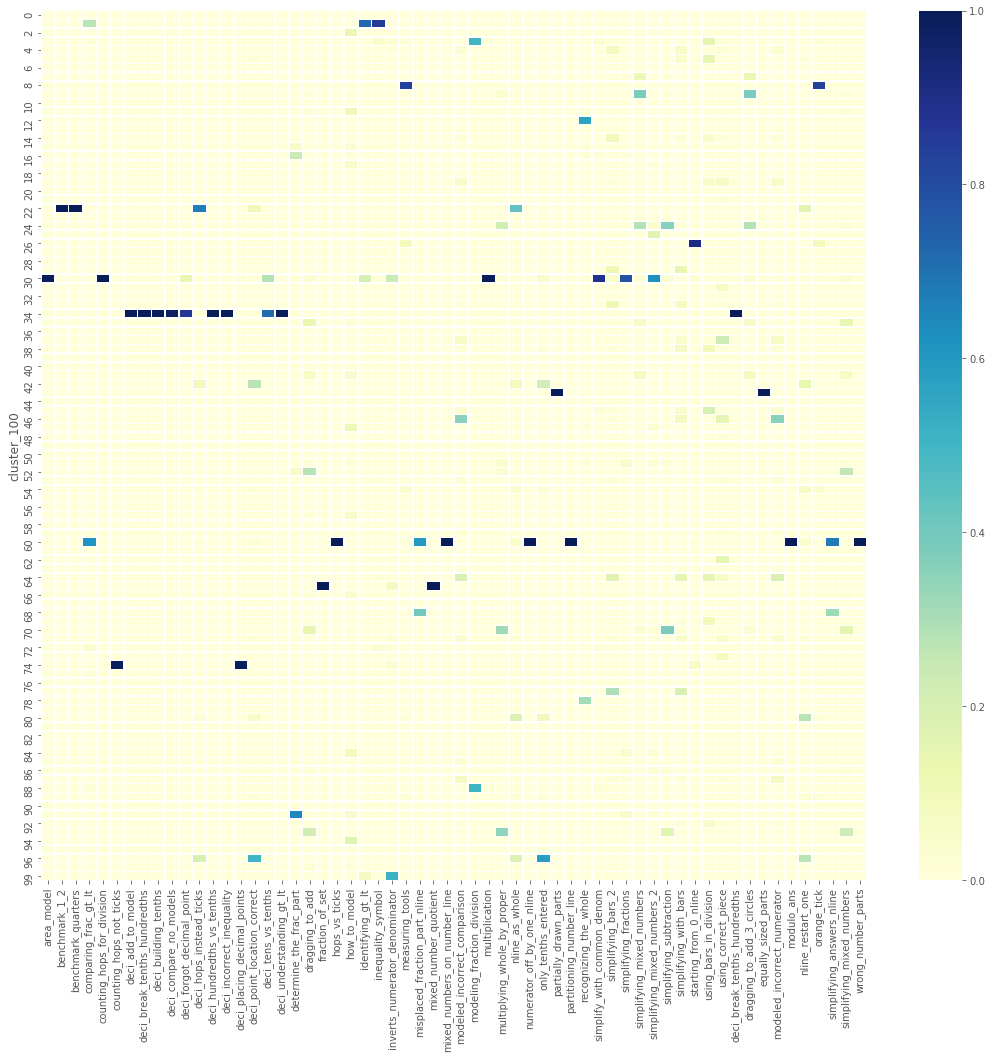

In [129]:
fig = plt.figure(figsize=(18.5, 16))
cmap = sns.cubehelix_palette(light=.95, as_cmap=True)
#sns.heatmap(df_traits_norm, cmap=cmap,  linewidths=.5)

sns.heatmap(df_traits_norm, cmap="YlGnBu",  linewidths=.5)

In [130]:
df_traits_norm.shape

(99, 60)

In [131]:
fig.savefig('heat_map2.png')


In [91]:
df_traits.to_csv('cluster_100.csv')

In [92]:
df_traits2 = pd.concat([df3['percent_correct'].groupby(df3['cluster_100']).describe(), df_traits], axis=1)

In [93]:
df_traits2.to_csv('cluster_100_plus_correct.csv')

In [94]:
df_traits_dict = df_traits.to_dict(orient='dict')

/Users/brianmckean/anaconda2/envs/hwenv/lib/python3.6/site-packages/pandas/core/frame.py:881: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  "columns will be omitted.", UserWarning)


In [95]:
df_traits_dict

{'area_model': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 0,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 0,
  19: 0,
  20: 0,
  21: 0,
  22: 0,
  23: 0,
  24: 0,
  25: 0,
  26: 0,
  27: 0,
  28: 0,
  29: 0,
  30: 16,
  31: 0,
  32: 0,
  33: 0,
  34: 0,
  35: 0,
  36: 0,
  37: 0,
  38: 0,
  39: 0,
  40: 0,
  41: 0,
  42: 0,
  43: 0,
  44: 0,
  45: 0,
  46: 0,
  47: 0,
  48: 0,
  49: 0,
  50: 0,
  51: 0,
  52: 0,
  53: 0,
  54: 0,
  55: 0,
  56: 0,
  57: 0,
  58: 0,
  59: 0,
  60: 0,
  61: 0,
  62: 0,
  63: 0,
  64: 0,
  65: 0,
  66: 0,
  67: 0,
  68: 0,
  69: 0,
  70: 0,
  71: 0,
  72: 0,
  73: 0,
  74: 0,
  75: 0,
  76: 0,
  77: 0,
  78: 0,
  79: 0,
  80: 0,
  81: 0,
  82: 0,
  83: 0,
  84: 0,
  85: 0,
  86: 0,
  87: 0,
  88: 0,
  89: 0,
  90: 0,
  91: 0,
  92: 0,
  93: 0,
  94: 0,
  95: 0,
  96: 0,
  97: 0,
  99: 0},
 'benchmark_1_2': {0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 0,
  8: 0,
  9: 0,
  10: 

In [96]:
df_traits_dict2 = {}
cluster_with_no_trait = list(np.arange(100))
cluster_with_lt_10_trait = list(np.arange(100))

In [97]:
for trait in df_traits_dict:
    #print (idx, trait)
    df_traits_dict2[trait] = {}
    for cluster in df_traits_dict[trait]:
        #print (trait, cluster, df_traits_dict[trait][cluster])
        if  df_traits_dict[trait][cluster] > 0:
            df_traits_dict2[trait][cluster] = df_traits_dict[trait][cluster]
            if cluster in cluster_with_no_trait:
                cluster_with_no_trait.remove(cluster)
            if  df_traits_dict[trait][cluster] > 9:
                if cluster in cluster_with_lt_10_trait:
                    cluster_with_lt_10_trait.remove(cluster)

In [98]:
print (df_traits_dict2)

{'area_model': {30: 16}, 'benchmark_1_2': {22: 8}, 'benchmark_quarters': {22: 66}, 'comparing_frac_gt_lt': {1: 149, 3: 5, 11: 2, 19: 2, 28: 1, 39: 1, 60: 333, 62: 4, 66: 1, 71: 2, 72: 23, 75: 8, 81: 4, 88: 7}, 'counting_hops_for_division': {30: 36}, 'counting_hops_not_ticks': {30: 6, 74: 886}, 'deci_add_to_model': {34: 113}, 'deci_break_tenths_hundredths': {34: 236}, 'deci_building_tenths': {34: 46}, 'deci_compare_no_models': {2: 1, 34: 156, 44: 1, 86: 1}, 'deci_forgot_decimal_point': {30: 38, 34: 236}, 'deci_hops_instead_ticks': {22: 184, 42: 23, 54: 2, 59: 1, 60: 2, 80: 6, 92: 1, 96: 55}, 'deci_hundredths_vs_tenths': {34: 244}, 'deci_incorrect_inequality': {34: 1282}, 'deci_placing_decimal_points': {30: 3, 74: 405}, 'deci_point_location_correct': {5: 1, 22: 11, 42: 29, 54: 1, 60: 2, 71: 1, 80: 6, 89: 1, 96: 53}, 'deci_tens_vs_tenths': {30: 90, 34: 227}, 'deci_understanding_gt_lt': {34: 1425}, 'determine_the_frac_part': {15: 1, 16: 4, 52: 1, 91: 11}, 'dragging_to_add': {7: 2, 9: 5, 11

In [99]:
cluster_with_no_trait, 

([0, 10, 13, 18, 32, 49, 56, 61, 63, 67, 76, 79, 82, 83, 95, 98],)

In [100]:
len(cluster_with_no_trait)

16

In [101]:
len(cluster_with_lt_10_trait)

34

In [102]:
x = list(df_traits.index)

In [103]:
df_traits.shape

(99, 60)

In [104]:
y = df_traits.sum(axis=1)

In [105]:
y

cluster_100
0        0
1     2854
2      711
3      177
4      114
5       22
6        4
7      101
8      766
9      279
10       0
11     641
12     747
13       0
14      68
15     188
16      73
17     270
18       0
19      97
20       5
21       5
22     446
23       4
24     326
25      18
26    1039
27       7
28       7
29      82
      ... 
69       3
70     470
71     132
72     127
73      14
74    1499
75      57
76       0
77     140
78     413
79       0
80     151
81      16
82       0
83       0
84     495
85      36
86      83
87     123
88      62
89      26
90      20
91     305
92      25
93     514
94     903
95       0
96     303
97      77
99    2594
Length: 99, dtype: int64

<Container object of 99 artists>

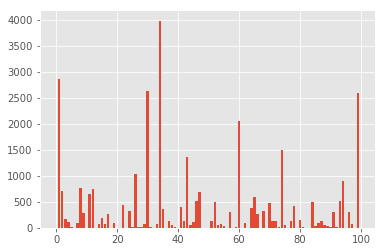

In [106]:

plt.bar( x, y)


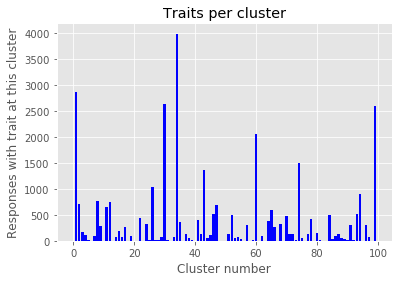

In [107]:
fig, ax = plt.subplots()

rects1 = ax.bar(x, y, color='b')
ax.set_xlabel('Cluster number')
ax.set_ylabel('Responses with trait at this cluster')
ax.set_title('Traits per cluster')



In [108]:
counts_per_cluster = np.bincount(km.labels_)

In [109]:
print (counts_per_cluster)

[ 563 3863  997 1703  850  101  129   88  708  229 1544 1370 1944  586  184
  933 2005  858 1703  711  415  186 1245 1541  378  275 2342  380  467  217
 9531  283  262  613 7246  571   65 1126  204  771    3  697  901 1085  211
  387 1203 1360  450  300  675  782 1010  188  436  127   30  429  421   81
 2315    1  840  217 1000 1840  487   37 2924  179  755  668 1186  592 3620
  350   68  543  926   46  933 1099 1421 2596 1500  565  369  421 1065  164
  827 1366   91 1156  993    8  947  242    0 5680]


In [110]:
counts_per_cluster = list(counts_per_cluster)

In [111]:
counts_per_cluster.remove(0)

In [112]:
counts_per_cluster = np.array(counts_per_cluster)

In [113]:
y1 = y / counts_per_cluster

In [114]:
y

cluster_100
0        0
1     2854
2      711
3      177
4      114
5       22
6        4
7      101
8      766
9      279
10       0
11     641
12     747
13       0
14      68
15     188
16      73
17     270
18       0
19      97
20       5
21       5
22     446
23       4
24     326
25      18
26    1039
27       7
28       7
29      82
      ... 
69       3
70     470
71     132
72     127
73      14
74    1499
75      57
76       0
77     140
78     413
79       0
80     151
81      16
82       0
83       0
84     495
85      36
86      83
87     123
88      62
89      26
90      20
91     305
92      25
93     514
94     903
95       0
96     303
97      77
99    2594
Length: 99, dtype: int64

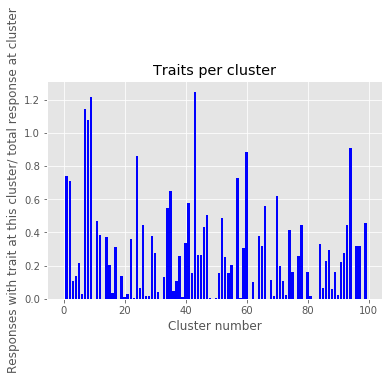

In [115]:
fig, ax = plt.subplots()

rects1 = ax.bar(x, y1, color='b')
ax.set_xlabel('Cluster number')
ax.set_ylabel('Responses with trait at this cluster/ total response at cluster')
ax.set_title('Traits per cluster')